In [24]:
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt

from CLIPTS import get_ts_embeddings, find_matches

In [25]:
BTC_MODEL_PATH = "weights/BTC_100000.pt"
BTC_VAL_PATH = "train_val_data/BTC_val.csv"

In [26]:
valid_df = pd.read_csv(BTC_VAL_PATH)
model, ts_embeddings = get_ts_embeddings(valid_df, BTC_MODEL_PATH)

Ignored unknown kwarg option direction


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/815 [00:00<?, ?it/s]

In [27]:
matches = find_matches(model, 
             ts_embeddings,
             query="BTC is a rocket. UP UP UP!",
             n=1000)

In [28]:
matches

tensor([15870, 17043, 16380, 16375, 16370, 16365, 16361, 16356, 16351, 16346,
        16341, 16336, 16331, 16326, 16321, 16316, 16313, 16308, 16303, 16298,
        16293,  2476, 16285, 16280, 16275, 16270, 16265, 16260, 16255, 16250,
        16245, 16240, 16235, 16230, 16225, 16220, 16215, 10774, 11019, 16204,
        16199, 16194, 16189, 16186, 16181, 16176, 16171, 16167, 16162, 16157,
        16152, 16147, 16142, 16139, 16136, 16131, 16126, 16121, 16116, 16111,
        16106, 16101, 16096, 16091, 16086, 16081, 16076, 16071, 16066, 16061,
        16056, 16053, 16048, 16043, 16038, 14910, 16030, 16027, 16022, 16017,
        15361, 16014, 15368, 15372, 15376, 15380, 15385, 15389, 16006, 15396,
        15401, 15406, 15410, 15415,   470, 15423, 15428, 15433, 15438, 15442,
        15446, 15449, 15453, 16000, 15461, 15466, 15469, 15995, 15993, 15480,
        15992, 15991, 15493, 15498, 15502, 15507, 15987, 15513, 15517, 15522,
        15526, 15529, 15534, 15539, 15544, 15548, 15552, 15557, 

Out of  1000  matches,  212  are empty


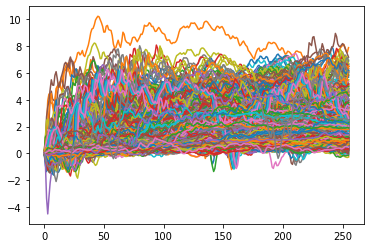

In [29]:
emptycount = 0
for i in ts_embeddings[matches]:
    if len(np.unique(np.array(i))) == 1:
        emptycount+=1
    else:
        plt.plot(i)
    
print("Out of ", len(ts_embeddings[matches]), " matches, ", emptycount, " are empty")